In [1]:
link = input('Enter the link: ')
comments = []

import time
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


op = webdriver.ChromeOptions()
op.add_argument('headless')

with Chrome(options=op) as driver:
    wait = WebDriverWait(driver,10)
    driver.get(link)

    for item in range(3): #by increasing the highest range you can get more content
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(3)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))):
        x = comment.text
        comments.append(x)
        print("\n",comment.text)

Enter the link: https://youtu.be/_eH5abTH9H8

 ►Book a free call with Ditto. Limited slots available - https://bit.ly/41crIfE

_____________________________________________________

►My stock market course (comes with 1 year community access), here: https://wisdomhatch.com/stock-market/

 THANK YOU FOR KEEPING US  FINANCIALLY UPDATED SOME OF THE COMMON MISTAKES MADE BY BEGINNER DAY TRADERS INCLUDE TRADING WITHOUT A PLAN, AVERAGING DOWN, RISKING TOO  MUCH ON ONE TRADE, CHASING HOT TRADES, FAILURE TO CUT LOSSES QUICKLY.

 You are learning yourself and explaining it to others as if you are an expert.
Often, your partial knowledge comes through.
However, your videos are useful so that we know where you are guessing and where you might be right.
All the best.

 Strong RBI rules for banking liquidity in india...collapse is wrong word for HDFC atleast  for next 10 -15 years...HDFC bank corrected due to merger issue with HDFC.. Strong asset base..less NPAs and strong provisioning against NPA..

In [2]:
# https://www.youtube.com/watch?v=npFE7NIy574

In [3]:
print(comments)

['►Book a free call with Ditto. Limited slots available - https://bit.ly/41crIfE\n\n_____________________________________________________\n\n►My stock market course (comes with 1 year community access), here: https://wisdomhatch.com/stock-market/', 'THANK YOU FOR KEEPING US  FINANCIALLY UPDATED SOME OF THE COMMON MISTAKES MADE BY BEGINNER DAY TRADERS INCLUDE TRADING WITHOUT A PLAN, AVERAGING DOWN, RISKING TOO  MUCH ON ONE TRADE, CHASING HOT TRADES, FAILURE TO CUT LOSSES QUICKLY.', 'You are learning yourself and explaining it to others as if you are an expert.\nOften, your partial knowledge comes through.\nHowever, your videos are useful so that we know where you are guessing and where you might be right.\nAll the best.', 'Strong RBI rules for banking liquidity in india...collapse is wrong word for HDFC atleast  for next 10 -15 years...HDFC bank corrected due to merger issue with HDFC.. Strong asset base..less NPAs and strong provisioning against NPA....keep buying PSU Banks for next 5 

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
df = pd.DataFrame(comments,columns=["Comment"])

print(df)

                                              Comment
0   ►Book a free call with Ditto. Limited slots av...
1   THANK YOU FOR KEEPING US  FINANCIALLY UPDATED ...
2   You are learning yourself and explaining it to...
3   Strong RBI rules for banking liquidity in indi...
4   20/30 years back our parents were totally depe...
5   One important lesson from Friday share price d...
6   I always visit your channel for these detailed...
7   Akshat I think hdfc might go upto 1450 ,and ma...
8   Just do something that will earn you money whi...
9   "The boy who shut the bank"\nOnce in old Engla...
10  There is no limit for government securities. I...
11  Informative video as always Akshat. HDFC bank ...
12  If HDFC - SBI - ICIC banks - BOB are 4 pillars...
13  Thank you for your efforts to make such qualit...
14  It was linked Msci changing its adjustment fac...
15  Hi Akshat, please make a post / video on good ...
16                                    Nicely laid out
17  Actually there will no i

In [5]:
def data_processing(text):
    text = str(text)
    if not isinstance(text, str):
        return None
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE)
    ...

    
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [6]:
import nltk
nltk.download('punkt')

df.text = df['Comment'].apply(data_processing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\piyus\AppData\Local\Temp\ipykernel_5480\2968911166.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.text = df['Comment'].apply(data_processing)


In [7]:
df = df.drop_duplicates('Comment')

In [8]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [9]:
df['Comment'] = df['Comment'].apply(lambda x: stemming(x) if isinstance(x, str) else x)

In [10]:
df.head()

,Comment
0,►Book a free call with Ditto. Limited slots av...
1,THANK YOU FOR KEEPING US FINANCIALLY UPDATED ...
2,You are learning yourself and explaining it to...
3,Strong RBI rules for banking liquidity in indi...
4,20/30 years back our parents were totally depe...


In [11]:
print(df['Comment'].iloc[0],"\n")
print(df['Comment'].iloc[1],"\n")
print(df['Comment'].iloc[2],"\n")
print(df['Comment'].iloc[3],"\n")
print(df['Comment'].iloc[4],"\n")

►Book a free call with Ditto. Limited slots available - https://bit.ly/41crIfE

_____________________________________________________

►My stock market course (comes with 1 year community access), here: https://wisdomhatch.com/stock-market/ 

THANK YOU FOR KEEPING US  FINANCIALLY UPDATED SOME OF THE COMMON MISTAKES MADE BY BEGINNER DAY TRADERS INCLUDE TRADING WITHOUT A PLAN, AVERAGING DOWN, RISKING TOO  MUCH ON ONE TRADE, CHASING HOT TRADES, FAILURE TO CUT LOSSES QUICKLY. 

You are learning yourself and explaining it to others as if you are an expert.
Often, your partial knowledge comes through.
However, your videos are useful so that we know where you are guessing and where you might be right.
All the best. 

Strong RBI rules for banking liquidity in india...collapse is wrong word for HDFC atleast  for next 10 -15 years...HDFC bank corrected due to merger issue with HDFC.. Strong asset base..less NPAs and strong provisioning against NPA....keep buying PSU Banks for next 5 years 

20/3

In [12]:
df['Comment'].fillna('', inplace=True)

In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
df['polarity'] = df['Comment'].apply(polarity)

In [15]:
df.head(10)

,Comment,polarity
0,►Book a free call with Ditto. Limited slots av...,0.242857
1,THANK YOU FOR KEEPING US FINANCIALLY UPDATED ...,0.001587
2,You are learning yourself and explaining it to...,0.371429
3,Strong RBI rules for banking liquidity in indi...,0.096429
4,20/30 years back our parents were totally depe...,0.130000
5,One important lesson from Friday share price d...,0.320000
6,I always visit your channel for these detailed...,0.733333
7,"Akshat I think hdfc might go upto 1450 ,and ma...",0.000000
8,Just do something that will earn you money whi...,0.281250
9,"""The boy who shut the bank""\nOnce in old Engla...",-0.025000


In [16]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [17]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [18]:
df.head()

,Comment,polarity,sentiment
0,►Book a free call with Ditto. Limited slots av...,0.242857,Positive
1,THANK YOU FOR KEEPING US FINANCIALLY UPDATED ...,0.001587,Positive
2,You are learning yourself and explaining it to...,0.371429,Positive
3,Strong RBI rules for banking liquidity in indi...,0.096429,Positive
4,20/30 years back our parents were totally depe...,0.130000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

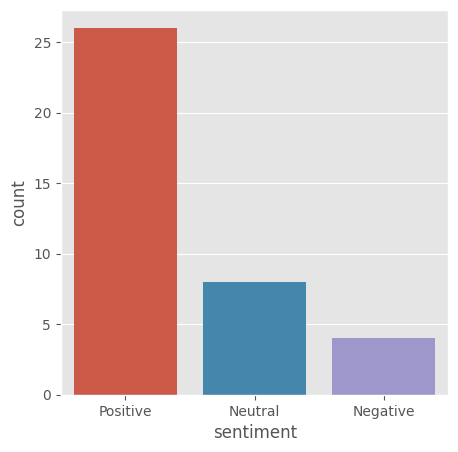

In [19]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

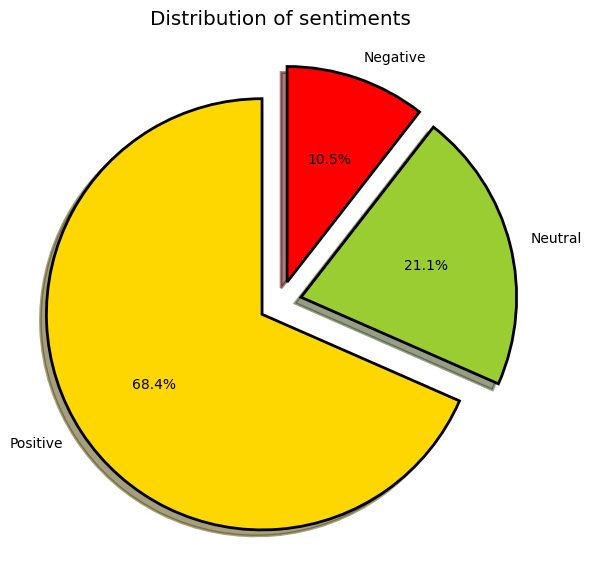

In [20]:
fig = plt.figure(figsize=(7,7))
colors = ("gold", "yellowgreen", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [21]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Comment,polarity,sentiment
18,Perfect stock picks...much needed,1.000000,Positive
6,I always visit your channel for these detailed...,0.733333,Positive
32,Excellent i like this person very much keep it...,0.630000,Positive
16,Nicely laid out,0.600000,Positive
27,"Please do discuss more about Aavas Finance , i...",0.500000,Positive


In [22]:
pos_tweets = df[df.sentiment == 'Negative']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Comment,polarity,sentiment
9,"""The boy who shut the bank""\nOnce in old Engla...",-0.025000,Negative
25,The loss of SVB was nominal loss and the 50% o...,-0.094167,Negative
36,Focus is required how governments duped the de...,-0.250000,Negative
24,Little knowledge is not always dangerous. Ask ...,-0.262500,Negative
